# Mobile Price Range Classification  
<br>
This is a dataset from kaggle which aims to find out the price range of different mobile phones. The ranges are in categorical form, thus we choose random forest classification to deal with this problem. 

## Data Exploration
<br>
Before we fit the data with the algorithm, we would like to see if there is any interesting relationship among the data. This dataset is already cleaned thus data cleansing is not neccesary.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

Import our dataset.

In [92]:
df = pd.read_csv('train.csv')

In [93]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Have a look on some basics information and statistics of the dataset.

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [95]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Find out the attribute pairs with strong correlation.

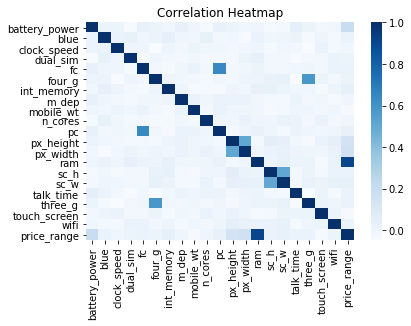

In [96]:
sns.heatmap(df.corr(), cmap='Blues').set_title('Correlation Heatmap')
plt.show()

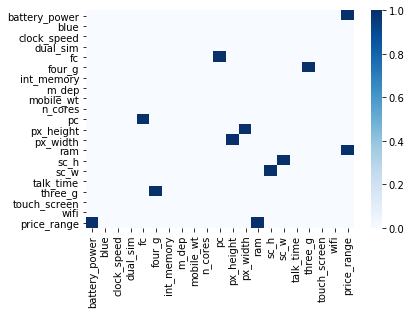

In [97]:
c = df.corr().apply(abs)
sns.heatmap((c>0.2)&(c!=1),cmap='Blues')

So now we can identify some attribute pairs with significant correlation. They are:<br/>
pc - fc<br/>
three_g - four_g<br/>
px_width - px_height<br/>
sc_h - sc_w<br/>
Other than that, we can also notice that price_range is significantly correlated to both battery_power and ram.<br><br>
We would also want to see the scatter plots between different numerical variables.

In [98]:
num_col = []
for col in df.columns:
    if df[col].nunique()!=2:
        num_col.append(col)
num_col.remove('price_range')

In [131]:
num = df[num_col+['price_range']]
num.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


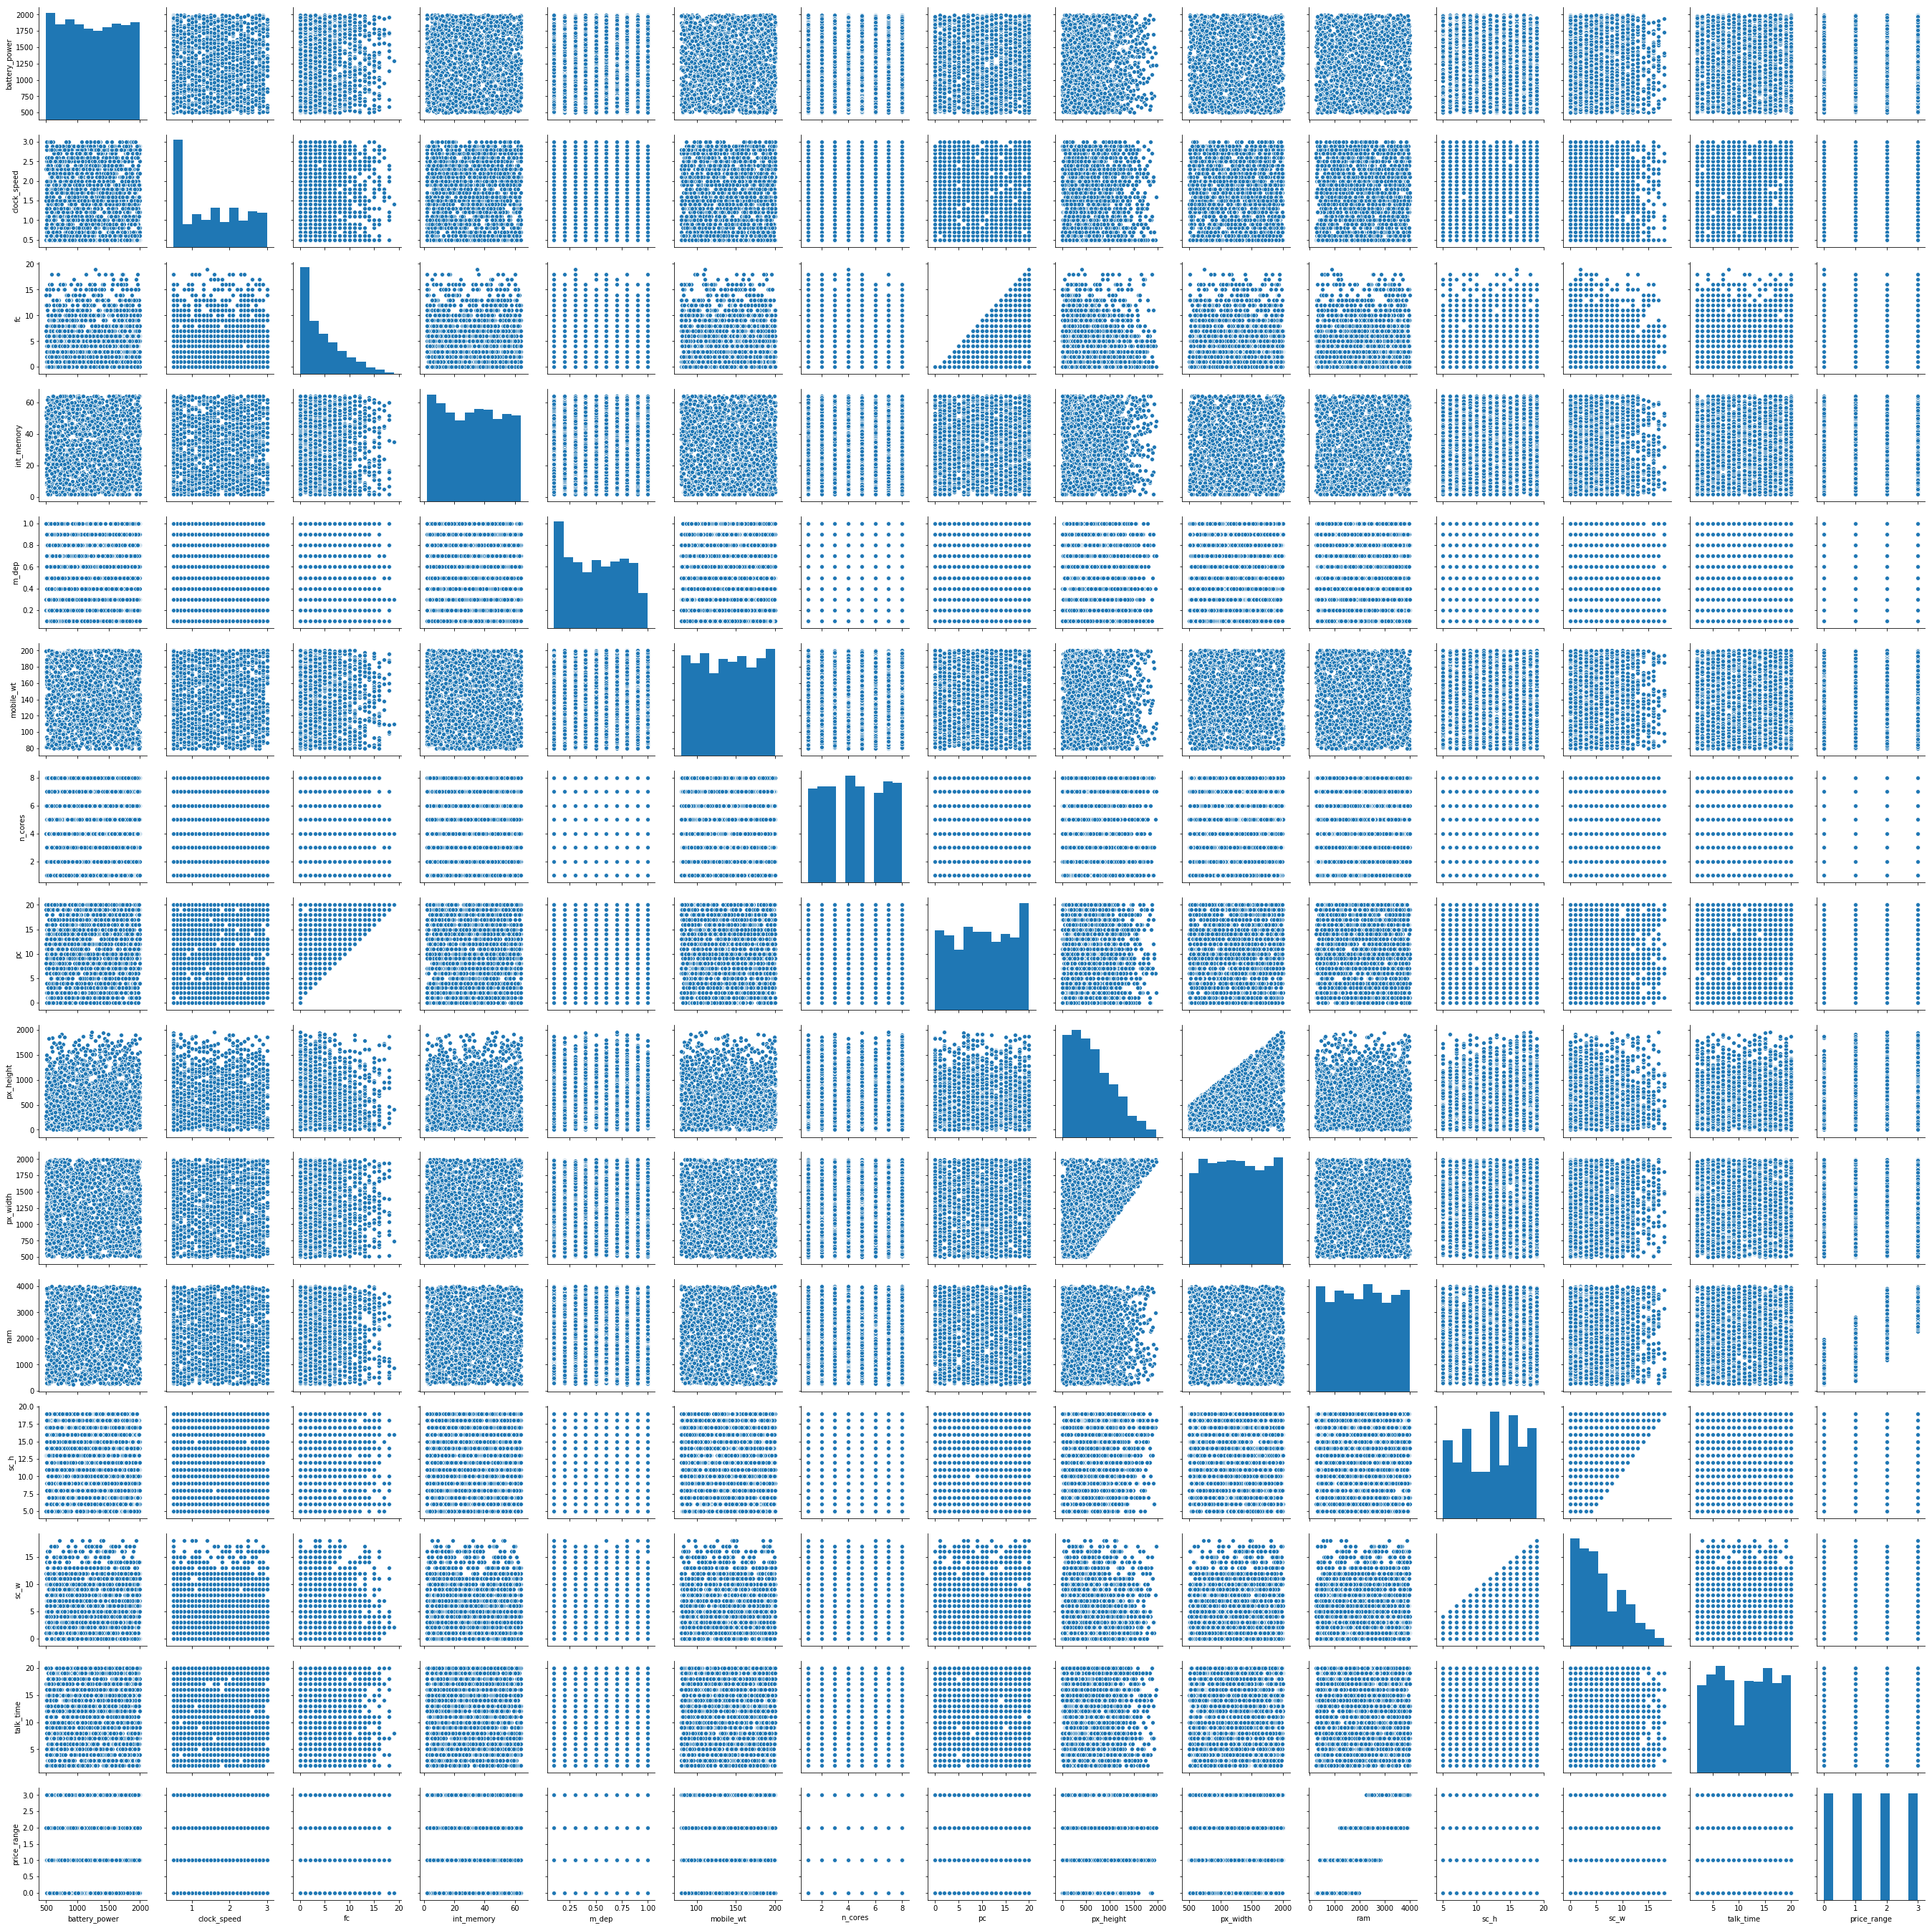

In [132]:
pairplot = sns.pairplot(num)

As expected, no significant patterns can be seen, thus we can move on with our machine learning model and let the algorithm do the work.

## Random Forest Classifier

In th second half of this notebook, we are going to go through a straightforward procedures to train a Random Forest Classifier and slightly tune the parameters to improve it's accuracy.

In [133]:
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

Define a function which gives a more readable confusion matrix than scikit-learn's version. 

In [134]:
def conf_matrix(y_test, pred, normalise=False,total=False):
    col = pd.Series(y_test.unique()).apply(str).sort_values()
    conf = confusion_matrix(y_test, pred)
    out = pd.DataFrame(conf,columns= [x+' (predict)' for x in col], index=[x+' (actual)' for x in col])
    out_1 = pd.DataFrame(conf,columns= [x+' (predict)' for x in col], index=[x+' (actual)' for x in col])

    if normalise==True:
        k = out.apply(lambda x: x.sum(),axis=1)
        for i in out.columns:
            out[i] = out[i]/k
            out[i]  = out[i].apply(lambda x: str(round(x*100,2))+'%')
    if total==True:
        out_1['Row total'] = out_1.apply(lambda x: x.sum(),axis=1)
        out_1.loc['Column total'] = out_1.apply(lambda x: x.sum(),axis=0)
        out['Row total'] = out_1['Row total']
        out.loc['Column total'] = out_1.loc['Column total']

    return out

Pre-process the dataset and scale the numerical features. 

In [135]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_num = X[num_col]
X_cat = X.drop(num_col,axis=1)
scaler = StandardScaler()
X_num = pd.DataFrame(scaler.fit_transform(X_num),index=X_num.index,columns=X_num.columns)
X = pd.concat([X_num,X_cat],axis=1)

Split the data into 70% of test set and 30% of training set.

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### Baseline model
Fit a random forest model with default setting as the baseline model. 

In [137]:
model = RandomForestClassifier(random_state=100)
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [138]:
print(classification_report(y_test,pred))
print("Accuracy: "+str(round(accuracy_score(y_test,pred)*100,2))+'%')
print('Confusion matrix:')
conf_matrix(y_test,pred)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       159
           1       0.74      0.76      0.75       146
           2       0.71      0.71      0.71       147
           3       0.87      0.82      0.84       148

   micro avg       0.80      0.80      0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600

Accuracy: 80.17%
Confusion matrix:


,0 (predict),1 (predict),2 (predict),3 (predict)
0 (actual),144,15,0,0
1 (actual),18,111,17,0
2 (actual),0,24,105,18
3 (actual),0,1,26,121


### Parameters tuning
Tuning parameters of the Random Forest Classifier to improve accuracy using 'RandomizedSearchCV' in Scikit-learn.

In [128]:
base_model = RandomForestClassifier(random_state=100)
rs = ShuffleSplit(n_splits=5, test_size=0.3, random_state=100)
base_score = cross_val_score(base_model, X, y, cv=rs, scoring='accuracy')
base = base_score.mean()

model = RandomForestClassifier(random_state=100)

random_grid = {'bootstrap': [True,False],
 'criterion': ['gini','entropy'],
 'max_depth': [int(x) for x in np.linspace(15, 150, num = 10)]+[None],
 'max_features': ['auto', 'log2', None],
 'max_leaf_nodes': [int(x) for x in np.linspace(100, 1000, num = 10)]+[None],
 'min_samples_leaf': list(np.arange(1,5)),
 'min_samples_split': list(np.arange(2,6)),
 'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 200, num = 16)],
 'class_weight': [None, 'balanced', 'balanced_subsample']}
model_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv =rs, verbose=0, random_state=100, n_jobs = -1,
                              scoring = 'accuracy')
model_random.fit(X, y)
model_best = model_random.best_estimator_
score = model_random.best_score_
improve = score-base
best_params = model_random.best_params_

In [141]:
print('Cross-validation mean accuracy: '+str(round(score*100,2))+'%\n')
print('Mean accuracy improvement compare to baseline model: '+str(round(improve*100,2))+'%\n')
print('Best parameters obtained in randomised grid search: ')
for key,value in list(best_params.items()):
    print(' -',str(key)+':\t',value)

Cross-validation mean accuracy: 90.87%

Mean accuracy improvement compare to baseline model: 9.17%

Best parameters obtained in randomised grid search: 
 - n_estimators:	 190
 - min_samples_split:	 3
 - min_samples_leaf:	 3
 - max_leaf_nodes:	 900
 - max_features:	 None
 - max_depth:	 105
 - criterion:	 entropy
 - class_weight:	 None
 - bootstrap:	 True


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
model_best.fit(X_train,y_train)
pred = model_best.predict(X_test)
print(classification_report(y_test,pred))
print("Accuracy: "+str(round(accuracy_score(y_test,pred)*100,2))+'%')
print('Confusion matrix:')
conf_matrix(y_test,pred)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       159
           1       0.84      0.83      0.83       146
           2       0.84      0.80      0.82       147
           3       0.93      0.94      0.93       148

   micro avg       0.89      0.89      0.89       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.89      0.89      0.89       600

Accuracy: 88.67%
Confusion matrix:


,0 (predict),1 (predict),2 (predict),3 (predict)
0 (actual),154,5,0,0
1 (actual),12,121,13,0
2 (actual),0,18,118,11
3 (actual),0,0,9,139


And here we go, with a classifier with higher accuracy compare to that with default setting!